# Support Vector Machines on the Breast Cancer Wisconsin (Diagnostic) Data Set

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-5 on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Predict breast cancer given all other values with the use of SVMs. <br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Classification task.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Data:** [Breast Cancer Wisconsin (Diagnostic) Data Set | Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2#)<br>
**Project Author:** Maksim Ekin Eren

SVM's goal is to have largest possible margin between decision boundary that separetes the classes and the training instances.
                                                                   
## Take a Look at the Data
First, lets load the data and gain some insight about it:

In [9]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

data = load_data("data", "data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,...,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890,nan
1,842517,M,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,...,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,nan
2,84300903,M,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,...,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758,nan
3,84348301,M,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,...,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300,nan
4,84358402,M,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,...,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,nan


Let's check if there are any missing values:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

We have total of 569 instances. Our label, diagnosis is type of object while all other attributes are floating point. We don't have any missing values. Let's take a look at the label attribute:

In [5]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

M = malignant (hostile), B = benign. Now let's look at the statistics to gain insights of the numerical data:

In [7]:
# format the scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,...,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,0.00000
mean,30371831.43234,14.12729,19.28965,91.96903,654.88910,0.09636,0.10434,0.08880,0.04892,0.18116,...,25.67722,107.26121,880.58313,0.13237,0.25427,0.27219,0.11461,0.29008,0.08395,nan
std,125020585.61222,3.52405,4.30104,24.29898,351.91413,0.01406,0.05281,0.07972,0.03880,0.02741,...,6.14626,33.60254,569.35699,0.02283,0.15734,0.20862,0.06573,0.06187,0.01806,nan
min,8670.00000,6.98100,9.71000,43.79000,143.50000,0.05263,0.01938,0.00000,0.00000,0.10600,...,12.02000,50.41000,185.20000,0.07117,0.02729,0.00000,0.00000,0.15650,0.05504,nan
25%,869218.00000,11.70000,16.17000,75.17000,420.30000,0.08637,0.06492,0.02956,0.02031,0.16190,...,21.08000,84.11000,515.30000,0.11660,0.14720,0.11450,0.06493,0.25040,0.07146,nan
50%,906024.00000,13.37000,18.84000,86.24000,551.10000,0.09587,0.09263,0.06154,0.03350,0.17920,...,25.41000,97.66000,686.50000,0.13130,0.21190,0.22670,0.09993,0.28220,0.08004,nan
75%,8813129.00000,15.78000,21.80000,104.10000,782.70000,0.10530,0.13040,0.13070,0.07400,0.19570,...,29.72000,125.40000,1084.00000,0.14600,0.33910,0.38290,0.16140,0.31790,0.09208,nan
max,911320502.00000,28.11000,39.28000,188.50000,2501.00000,0.16340,0.34540,0.42680,0.20120,0.30400,...,49.54000,251.20000,4254.00000,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750,nan


There is one attribute that we are not sure what it is "Unnamed". We will drop this attribute. Also, we don't need the id column as it only identifies the entry:

In [12]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.drop(["id"], axis=1, inplace=True)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,...,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000
mean,14.12729,19.28965,91.96903,654.88910,0.09636,0.10434,0.08880,0.04892,0.18116,0.06280,...,16.26919,25.67722,107.26121,880.58313,0.13237,0.25427,0.27219,0.11461,0.29008,0.08395
std,3.52405,4.30104,24.29898,351.91413,0.01406,0.05281,0.07972,0.03880,0.02741,0.00706,...,4.83324,6.14626,33.60254,569.35699,0.02283,0.15734,0.20862,0.06573,0.06187,0.01806
min,6.98100,9.71000,43.79000,143.50000,0.05263,0.01938,0.00000,0.00000,0.10600,0.04996,...,7.93000,12.02000,50.41000,185.20000,0.07117,0.02729,0.00000,0.00000,0.15650,0.05504
25%,11.70000,16.17000,75.17000,420.30000,0.08637,0.06492,0.02956,0.02031,0.16190,0.05770,...,13.01000,21.08000,84.11000,515.30000,0.11660,0.14720,0.11450,0.06493,0.25040,0.07146
50%,13.37000,18.84000,86.24000,551.10000,0.09587,0.09263,0.06154,0.03350,0.17920,0.06154,...,14.97000,25.41000,97.66000,686.50000,0.13130,0.21190,0.22670,0.09993,0.28220,0.08004
75%,15.78000,21.80000,104.10000,782.70000,0.10530,0.13040,0.13070,0.07400,0.19570,0.06612,...,18.79000,29.72000,125.40000,1084.00000,0.14600,0.33910,0.38290,0.16140,0.31790,0.09208
max,28.11000,39.28000,188.50000,2501.00000,0.16340,0.34540,0.42680,0.20120,0.30400,0.09744,...,36.04000,49.54000,251.20000,4254.00000,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750


Now let's plot the numerical data to see the distributions:

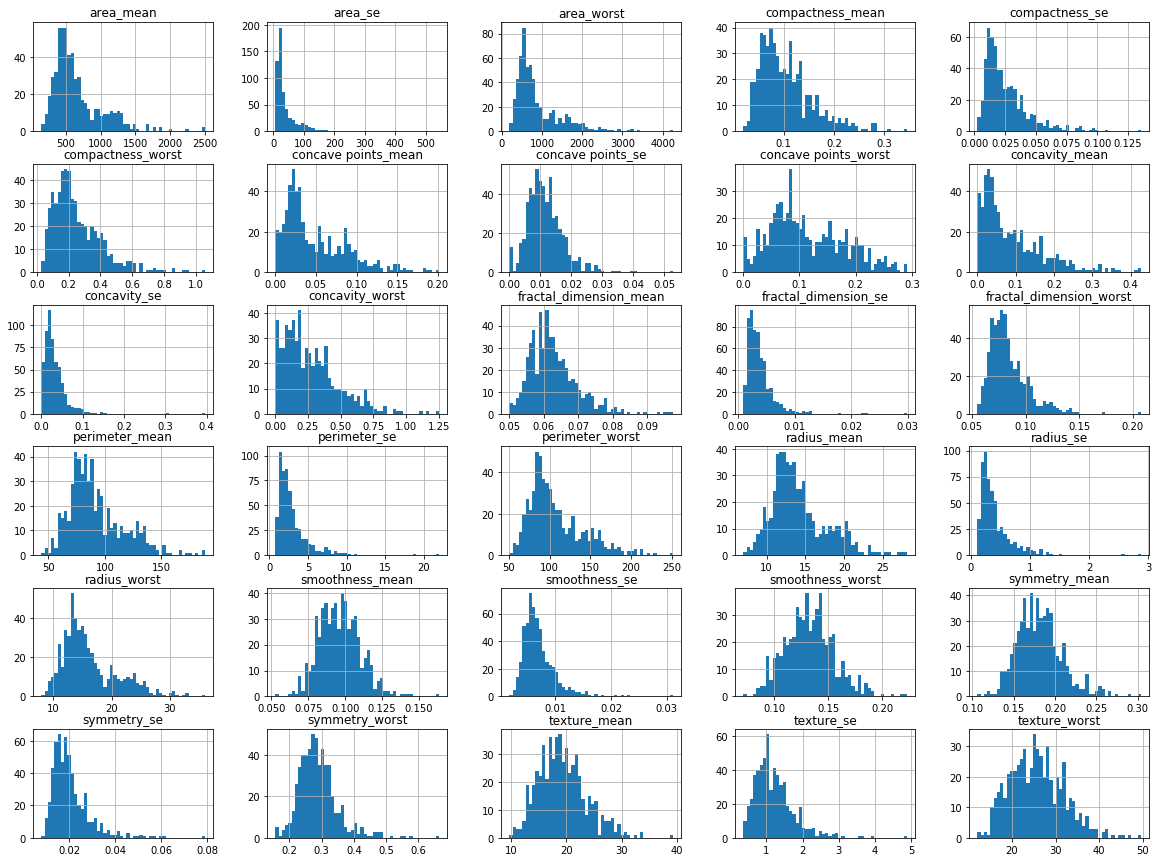

In [14]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# plot histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

## Separete Features from Labels
Let's seperate the features from the labels:

In [19]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"].values.copy()

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,...,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,...,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758
3,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,...,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300
4,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56000,22.39000,142.00000,1479.00000,0.11100,0.11590,0.24390,0.13890,0.17260,0.05623,...,25.45000,26.40000,166.10000,2027.00000,0.14100,0.21130,0.41070,0.22160,0.20600,0.07115
565,20.13000,28.25000,131.20000,1261.00000,0.09780,0.10340,0.14400,0.09791,0.17520,0.05533,...,23.69000,38.25000,155.00000,1731.00000,0.11660,0.19220,0.32150,0.16280,0.25720,0.06637
566,16.60000,28.08000,108.30000,858.10000,0.08455,0.10230,0.09251,0.05302,0.15900,0.05648,...,18.98000,34.12000,126.70000,1124.00000,0.11390,0.30940,0.34030,0.14180,0.22180,0.07820
567,20.60000,29.33000,140.10000,1265.00000,0.11780,0.27700,0.35140,0.15200,0.23970,0.07016,...,25.74000,39.42000,184.60000,1821.00000,0.16500,0.86810,0.93870,0.26500,0.40870,0.12400


In [32]:
y[:25]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M'],
      dtype=object)

## Separate Test and Training Sets
Now we can setup our ML pipeline. First we need to split our dataset into training and test sets:

In [34]:
from sklearn.model_selection import train_test_split

# test set size of 10% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

512
57
512
57


## Classification

Let's create a pipeline that will use LinearSVC. First, it will normalize the feature values using Standard Scaler. Hyperparameter C 1, and loss function hinge will be used:

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Now let's do a prediction on few values from training set:

In [85]:
predictions = svm_clf.predict(X_train.iloc[:5])
actual = y_train[:5]

print("Predictions\t", "Actual\t\t")
for index in range(len(predictions)):
    print(predictions[index], "\t\t", actual[index])

Predictions	 Actual		
M 		 M
M 		 M
B 		 B
B 		 B
M 		 M


This looks very good. Now let's try different SVMs:

In [112]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# hyperparameter C
C = 5
alpha = 1 / (C * len(X))


lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

In [113]:
# scaler instance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [115]:
lin_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)
sgd_clf.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [116]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.29012307] [[-0.17490985 -0.17221419 -0.34125073  0.17195822 -0.02479167 -1.34012976
   0.9409885   1.96283062  0.11771365  0.29260962  2.17417135 -0.93606275
  -0.72933915  1.21339394  0.55897242  0.16647018 -1.13977987  0.95321043
  -0.31956818 -1.54554024  1.66904212  2.07477491  0.19981971  1.79856343
   0.54863541 -0.74611036  1.99092848  0.05428236  0.9846049   0.36901696]]
SVC:                          [0.2772694] [[-0.13841031 -0.19131728 -0.33324853  0.18789119  0.11952227 -1.39536568
   0.8555041   1.90931841  0.09732046  0.20953767  2.13154324 -0.91237102
  -0.5020337   1.10010265  0.56288987  0.18045436 -1.1708146   1.0489148
  -0.37434506 -1.61913972  1.63265009  2.0602598   0.18373503  1.76888822
   0.43502042 -0.69545531  2.10057234 -0.12480542  1.06043034  0.43858904]]
SGDClassifier(alpha=0.00200): [-0.222] [[ 0.24965107  0.32306891  0.2399935   0.26476029  0.05541755 -0.0547158
   0.25695192  0.29636255  0.07330174 -0.19560644  0.2903617

## Evaluate with the Accuracy Scores:

In [119]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.994140625

In [120]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [121]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [122]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.990234375

In [124]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.986328125